In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load embeddings
def load_pickled_embeddings(path: str) -> dict[str, np.ndarray]:
    return joblib.load(path)

# compute cosine similarity
def cosine_similarity(vectors: np.ndarray) -> np.ndarray:
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    normalized_vecs = vectors/norms
    cos_sim = np.dot(normalized_vecs, normalized_vecs.T)
    return cos_sim

def cosine_similarity_df(vectors_df: pd.DataFrame) -> pd.DataFrame:
    vec_names = vectors_df.index.tolist()
    similarity_arr = cosine_similarity(vectors_df.to_numpy())
    return pd.DataFrame(similarity_arr, index=vec_names, columns=vec_names)

In [3]:
embeddings_dict = load_pickled_embeddings(path=os.path.join("..", "Datasets", "Embeddings saved as pickle", "saved_embeddings.pickle"))
embeddings = np.vstack([v for v in embeddings_dict.values()])
cosine_similarity(embeddings)

array([[ 0.9999999 ,  0.6009766 ,  0.00131982, -0.08264153,  0.08377896,
         0.02035534, -0.02047458,  0.00640713],
       [ 0.6009766 ,  1.        , -0.02428079, -0.04380483,  0.08638033,
         0.06192247,  0.01303345,  0.0880044 ],
       [ 0.00131982, -0.02428079,  1.        ,  0.6514294 ,  0.0508386 ,
         0.02427283,  0.09184363,  0.10256989],
       [-0.08264153, -0.04380483,  0.6514294 ,  0.9999999 , -0.06312088,
         0.04272888,  0.14104337,  0.14726834],
       [ 0.08377896,  0.08638033,  0.0508386 , -0.06312088,  1.        ,
         0.35196286,  0.04364174,  0.18336758],
       [ 0.02035534,  0.06192247,  0.02427283,  0.04272888,  0.35196286,
         1.        ,  0.02619306,  0.22045234],
       [-0.02047458,  0.01303345,  0.09184363,  0.14104337,  0.04364174,
         0.02619306,  1.        ,  0.32830966],
       [ 0.00640713,  0.0880044 ,  0.10256989,  0.14726834,  0.18336758,
         0.22045234,  0.32830966,  0.9999999 ]], dtype=float32)

In [4]:
embeddings_dict = load_pickled_embeddings(path=os.path.join("..", "Datasets", "Embeddings saved as pickle", "saved_embeddings.pickle"))
embeddings_df = pd.DataFrame(embeddings_dict).transpose()
embeddings_df.columns = [f"x_{i}" for i in range(embeddings_df.shape[1])]

cosine_similarity_df(embeddings_df)

,man driving bike,man driving car,eating apple,eating orange,company,Chief executive officer,sad,happy
man driving bike,1.000000,0.600977,0.001320,-0.082642,0.083779,0.020355,-0.020475,0.006407
man driving car,0.600977,1.000000,-0.024281,-0.043805,0.086380,0.061922,0.013033,0.088004
eating apple,0.001320,-0.024281,1.000000,0.651429,0.050839,0.024273,0.091844,0.102570
eating orange,-0.082642,-0.043805,0.651429,1.000000,-0.063121,0.042729,0.141043,0.147268
company,0.083779,0.086380,0.050839,-0.063121,1.000000,0.351963,0.043642,0.183368
Chief executive officer,0.020355,0.061922,0.024273,0.042729,0.351963,1.000000,0.026193,0.220452
sad,-0.020475,0.013033,0.091844,0.141043,0.043642,0.026193,1.000000,0.328310
happy,0.006407,0.088004,0.102570,0.147268,0.183368,0.220452,0.328310,1.000000


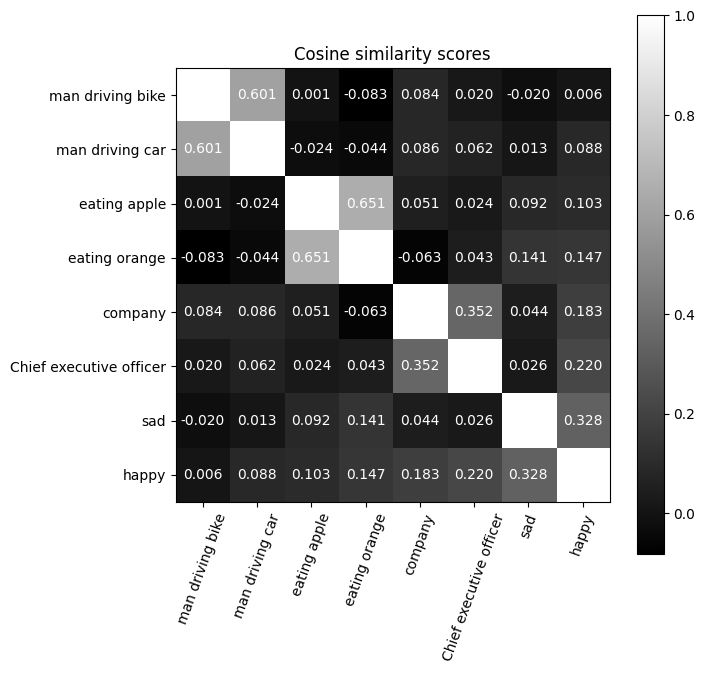

In [5]:
# ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens',
# 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r',
# 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn',
# 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr',
# 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool',
# 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
# 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg',
# 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma',
# 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
# 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r',
# 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

df = cosine_similarity_df(embeddings_df)

plt.figure(figsize=(7, 7))
plt.imshow(df, cmap='binary_r', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title("Cosine similarity scores")
plt.xlabel("")
plt.ylabel("")
plt.xticks(np.arange(df.shape[1]), df.columns.tolist(), rotation=70)
plt.yticks(np.arange(df.shape[0]), df.index.tolist())
plt.grid(False)  # Disable grid

for (i, j), value in np.ndenumerate(df.to_numpy()):
        plt.text(j, i, f'{value:.3f}', ha='center', va='center', color='white')

plt.savefig("cosine_similarity.png", dpi=500)
plt.show()